In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


/home/shinds/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
x = pd.read_csv("BASEL_X.csv")
y = pd.read_csv("BASEL_Y.csv")

In [6]:
x.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,15.536782
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,8.721323
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,-5.700000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,8.700000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,15.800000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,22.300000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,38.600000


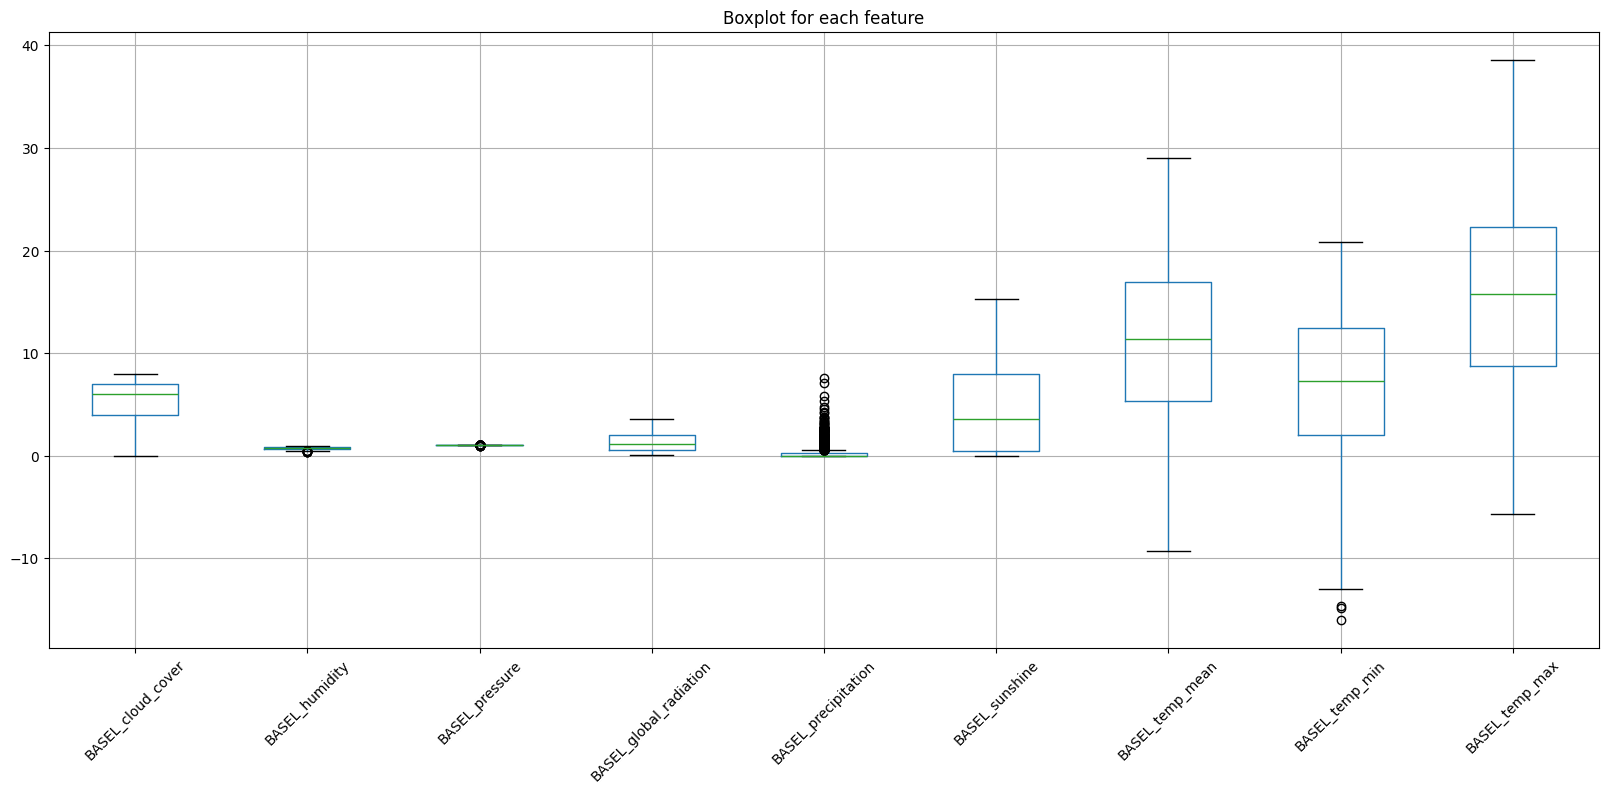

In [21]:
import matplotlib.pyplot as plt

x.drop(columns=['DATE', 'MONTH'], errors='ignore').boxplot(figsize=(20,8))
plt.xticks(rotation=45)
plt.title('Boxplot for each feature')
plt.show()

In [22]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1

outliers = ((x < (Q1 - 1.5 * IQR)) | (x > (Q3 + 1.5 * IQR))).sum()
print("컬럼별 이상치 수:\n", outliers)

컬럼별 이상치 수:
 DATE                        0
MONTH                       0
BASEL_cloud_cover           0
BASEL_humidity              9
BASEL_pressure             94
BASEL_global_radiation      0
BASEL_precipitation       536
BASEL_sunshine              0
BASEL_temp_mean             0
BASEL_temp_min              3
BASEL_temp_max              0
dtype: int64


In [14]:
x.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       'BASEL_temp_max'],
      dtype='object')

In [7]:
y.describe()

,DATE
count,3.654000e+03
mean,2.004568e+07
std,2.874287e+04
min,2.000010e+07
25%,2.002070e+07
50%,2.004567e+07
75%,2.007070e+07
max,2.010010e+07


In [11]:
print(x.isnull().sum())
print(y.isnull().sum())

DATE                      0
MONTH                     0
BASEL_cloud_cover         0
BASEL_humidity            0
BASEL_pressure            0
BASEL_global_radiation    0
BASEL_precipitation       0
BASEL_sunshine            0
BASEL_temp_mean           0
BASEL_temp_min            0
BASEL_temp_max            0
dtype: int64
DATE                 0
BASEL_BBQ_weather    0
dtype: int64


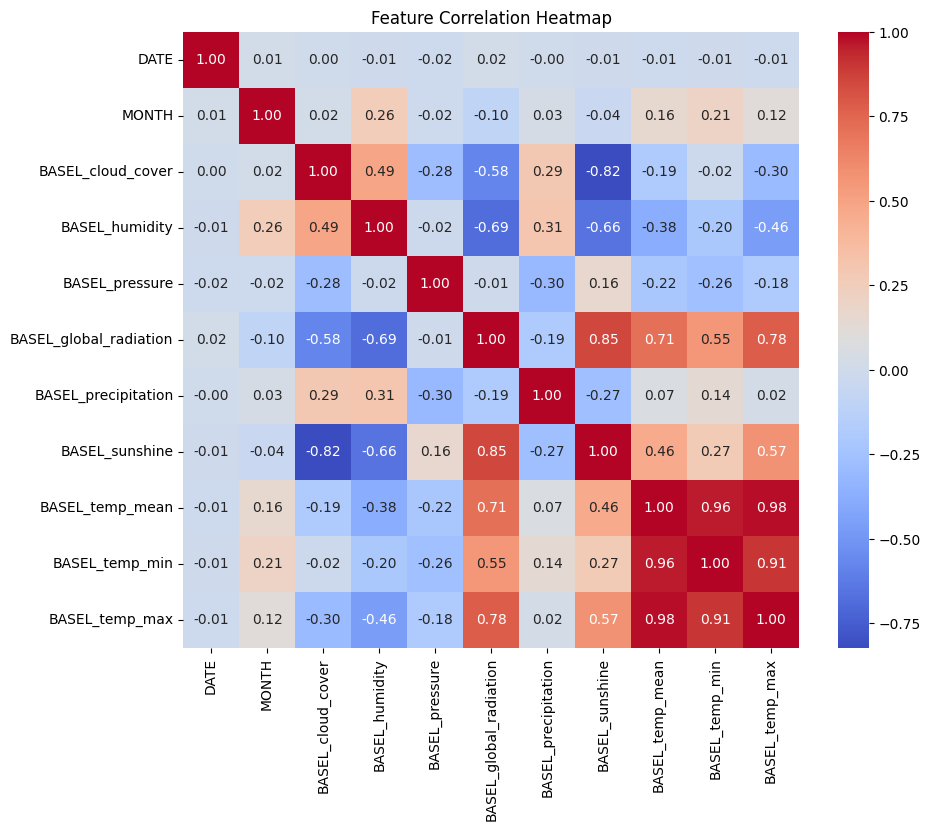

In [12]:
corr_matrix = x.corr()

# 2. 히트맵으로 시각화
plt.figure(figsize=(10,8)) # 그림 사이즈 조절
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
x_new = pd.read_csv('./BASEL_X.csv')

In [18]:
epsilon = 1e-6
# 1. temp_range 추가 (최대 온도 - 최소 온도)
x_new['temp_range'] = x_new['BASEL_temp_max'] - x_new['BASEL_temp_min']

# 2. humidity_pressure_ratio 추가 (습도 / 기압)
x_new['humidity_pressure_ratio'] = x_new['BASEL_humidity'] / (x_new['BASEL_pressure'] + epsilon)

# 3. cloud_sun_ratio 추가 (구름량 / 햇빛량)
x_new['cloud_sun_ratio'] = x_new['BASEL_cloud_cover'] / (x_new['BASEL_sunshine'] + epsilon)

# 4. radiation_precip_ratio 추가 (방사선량 / 강수량)
x_new['radiation_precip_ratio'] = x_new['BASEL_global_radiation'] / (x_new['BASEL_precipitation'] + epsilon)

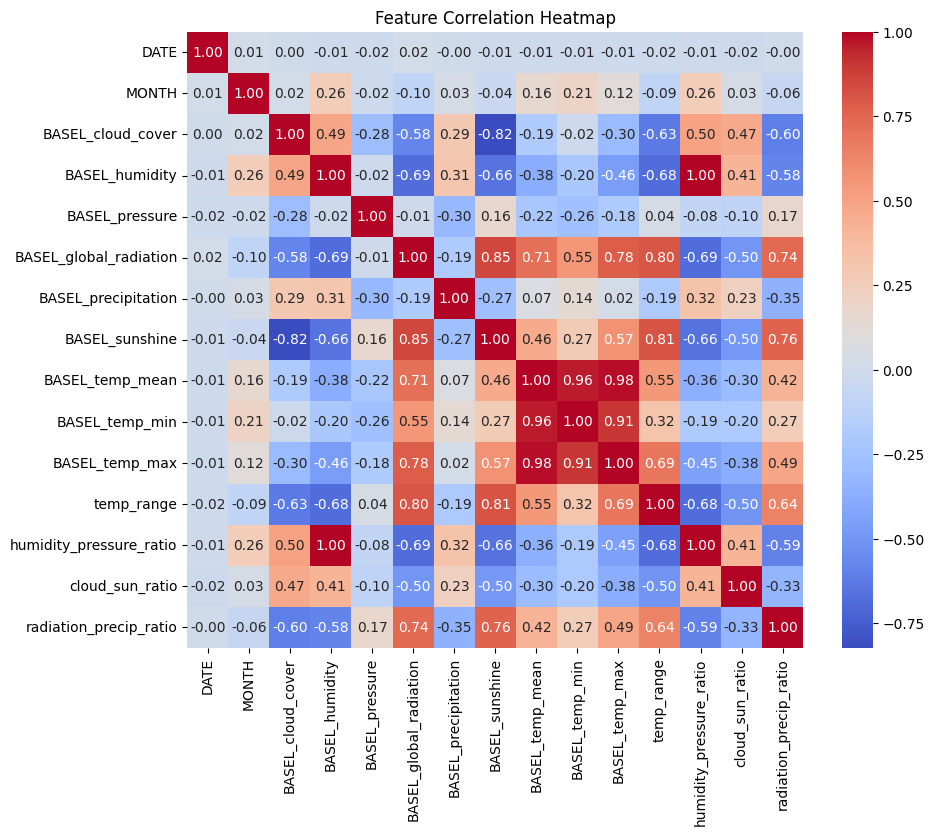

In [20]:
corr_matrix = x_new.corr()

# 2. 히트맵으로 시각화
plt.figure(figsize=(10,8)) # 그림 사이즈 조절
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()